# Principal Component Analysis with Cancer Data

In [265]:
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [268]:
df_cancer=pd.read_csv('breast-cancer-wisconsin-data.csv')
df_cancer.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [0]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [3]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


#### Since Bare Nuclei being a numeric has object 

In [269]:
df_cancer.shape

(699, 11)

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [266]:
# We could see "?" values in column, this should be removed from data set
# Check for missing value in any other column

In [21]:
df_cancer.isna().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [0]:
# No missing values found. So let us try to remove ? from bare nuclei column
# Get count of rows having '?'

In [270]:
#Hence checking for missing values for bare nuclei only
df_cancer['Bare Nuclei'].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [15]:
#Hence we see a missing value as '?'
df_cancer[df_cancer['Bare Nuclei'] == '?']

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [0]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

In [20]:
print(df_cancer['Bare Nuclei'].mode())
#print(df_cancer['Bare Nuclei'].median())

0    1
dtype: object


In [31]:
#replacing '?' with mode 
#loc because to get the '1'
df_cancer['Bare Nuclei'].replace('?',df_cancer['Bare Nuclei'].mode().loc[0],inplace=True)

In [32]:
df_cancer['Bare Nuclei'].value_counts()

1     418
10    132
5      30
2      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

#### Change the datatype  to numeric

In [41]:
df_cancer['Bare Nuclei']=df_cancer['Bare Nuclei'].astype(int)

In [42]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null int32
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int32(1), int64(10)
memory usage: 57.4 KB


### Check for duplicate values

In [47]:
df_cancer.duplicated().value_counts()

False    690
True       9
dtype: int64

In [55]:
# We have 9 duplicate entries
#Printing all the duplicates entries
df_cancer[df_cancer.duplicated(keep=False)]['ID']

42     1100524
62     1116116
168    1198641
207    1218860
208    1218860
253    1100524
254    1116116
258    1198641
267     320675
272     320675
314     704097
321     733639
322     733639
338     704097
560    1321942
561    1321942
683     466906
684     466906
Name: ID, dtype: int64

In [58]:
df_cancer.drop_duplicates(inplace=True)

In [59]:
df_cancer.duplicated().value_counts()
#Hence no duplicate value

False    690
dtype: int64

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [271]:
#Dropping ID as it has no correlation
df_cancer.drop('ID',axis=1,inplace=True)

In [65]:
# Check for correlation of variable
df_cancer.corr()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ClumpThickness,1.000000,0.643173,0.653589,0.487715,0.517253,0.590648,0.561063,0.535507,0.350196,0.716812
Cell Size,0.643173,1.000000,0.905349,0.712933,0.746982,0.684571,0.759632,0.727073,0.459918,0.817586
Cell Shape,0.653589,0.905349,1.000000,0.690782,0.714243,0.704165,0.738576,0.724519,0.440435,0.817551
Marginal Adhesion,0.487715,0.712933,0.690782,1.000000,0.608281,0.672512,0.669860,0.602228,0.417008,0.701175
Single Epithelial Cell Size,0.517253,0.746982,0.714243,0.608281,1.000000,0.580487,0.620526,0.633880,0.482517,0.681063
Bare Nuclei,0.590648,0.684571,0.704165,0.672512,0.580487,1.000000,0.672754,0.578161,0.342823,0.816655
Normal Nucleoli,0.561063,0.759632,0.738576,0.669860,0.620526,0.672754,1.000000,0.669099,0.343769,0.756736
Bland Chromatin,0.535507,0.727073,0.724519,0.602228,0.633880,0.578161,0.669099,1.000000,0.427490,0.715363
Mitoses,0.350196,0.459918,0.440435,0.417008,0.482517,0.342823,0.343769,0.427490,1.000000,0.423947
Class,0.716812,0.817586,0.817551,0.701175,0.681063,0.816655,0.756736,0.715363,0.423947,1.000000


In [0]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

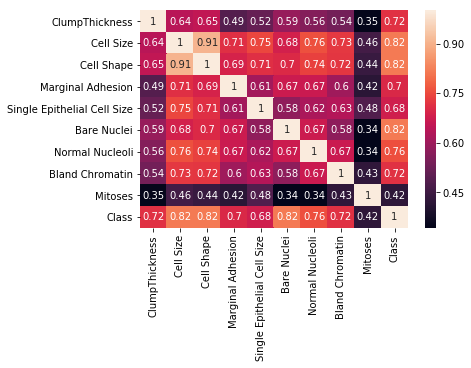

In [66]:
sns.heatmap(df_cancer.corr(),annot=True)

In [0]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

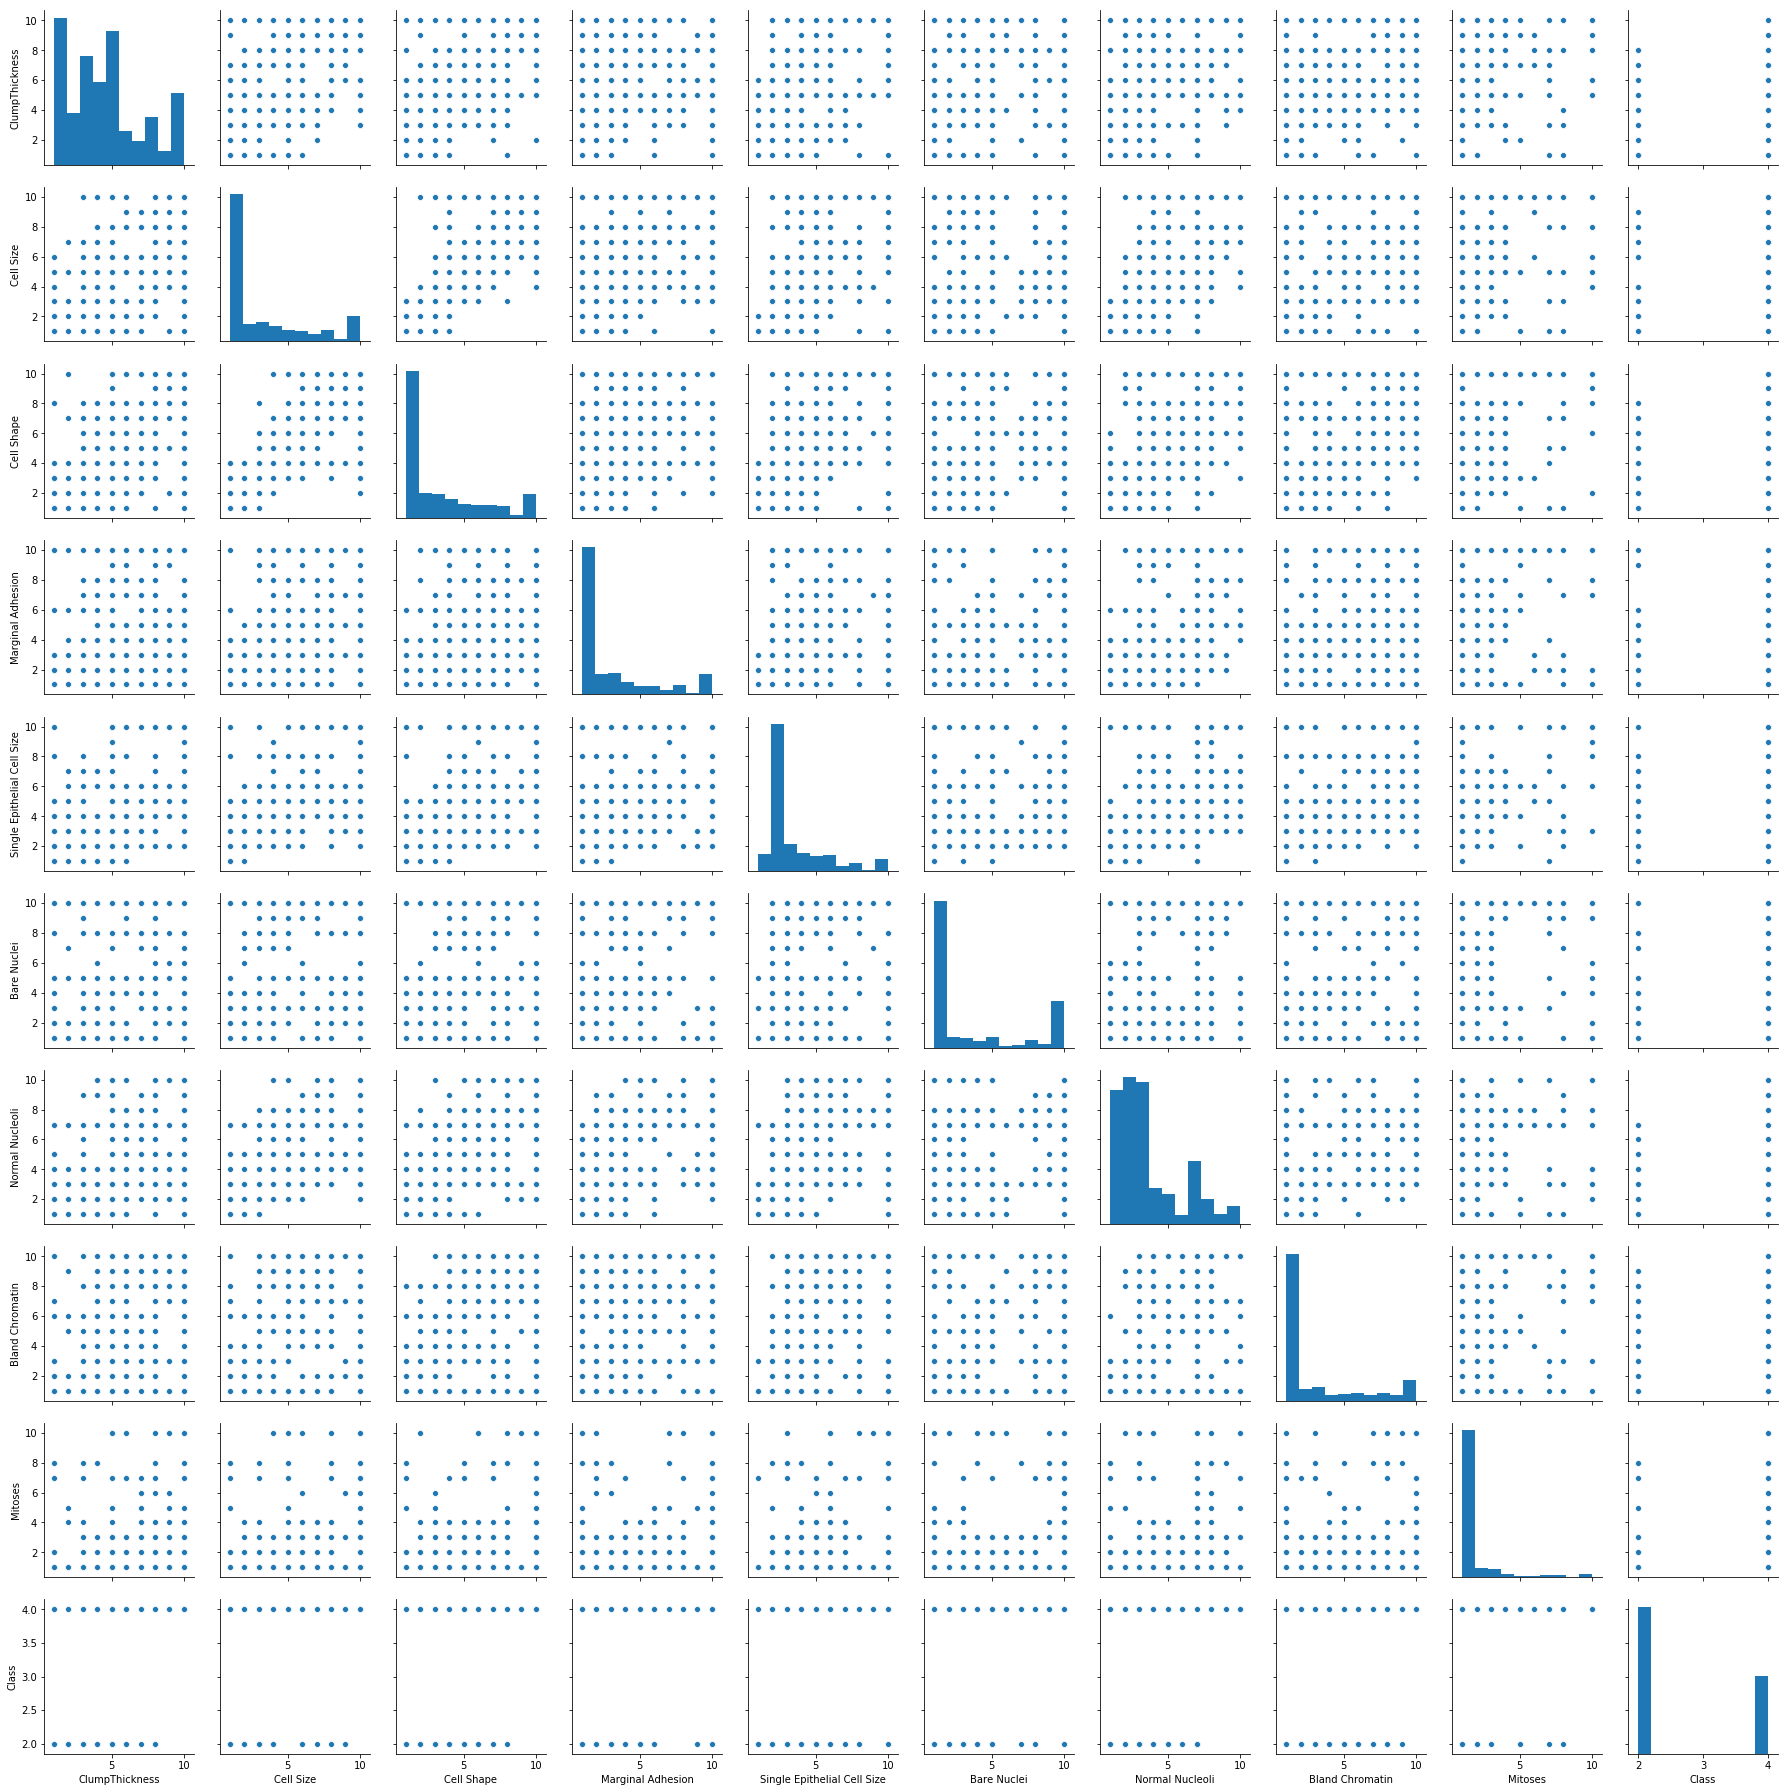

In [68]:
#Let us check for pair plots
sns.pairplot(df_cancer)

In [99]:
#Bivariate Analysis
sns.set_style('whitegrid')

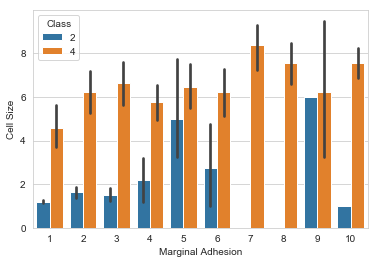

In [281]:
sns.barplot(x='Marginal Adhesion',y='Cell Size',hue='Class',data=df_cancer)

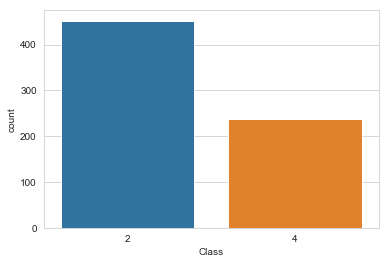

In [100]:
#Distribution of Class
sns.countplot(df_cancer['Class'])

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

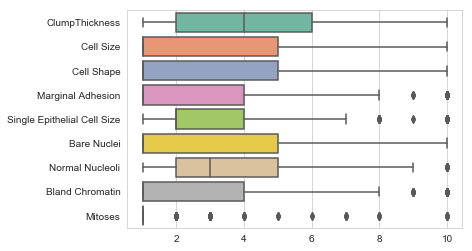

In [98]:
#with box plot we can get to know the outliers
#We dont need the target variable class for pre processing
df_cancer1=df_cancer.drop('Class',axis=1)
sns.boxplot(data=df_cancer1, orient='h',palette="Set2")

In [105]:
#cross tab to distribution of data for that column and also detect outliers
pd.crosstab(df_cancer['Marginal Adhesion'],df_cancer['Class'])

Class,2,4
Marginal Adhesion,,
1,369,31
2,37,19
3,31,27
4,5,28
5,4,19
6,4,18
7,0,13
8,0,25
9,1,4


In [ ]:
#We are imputing the value of upper iqr value marginale adhesion for outliers 

In [115]:
df_cancer1['Marginal Adhesion']=np.where(df_cancer1['Marginal Adhesion'] > 4,4,df_cancer1['Marginal Adhesion'])

In [113]:
pd.crosstab(df_cancer['Marginal Adhesion'],df_cancer['Class'])

Class,2,4
Marginal Adhesion,,
1,369,31
2,37,19
3,31,27
4,15,161


In [118]:
#We are imputing the value of upper iqr value Single Epithelial Cell Size for outliers 
pd.crosstab(df_cancer['Single Epithelial Cell Size'],df_cancer['Class'])

Class,2,4
Single Epithelial Cell Size,,
1,44,1
2,359,23
3,29,42
4,7,41
5,5,34
6,2,39
7,3,9
8,2,18
9,0,2


In [282]:
#Repeating for all the columns having outliers

In [119]:
df_cancer1['Single Epithelial Cell Size']=np.where(df_cancer1['Single Epithelial Cell Size'] > 6,6,df_cancer1['Single Epithelial Cell Size'])

In [122]:
pd.crosstab(df_cancer['Normal Nucleoli'],df_cancer['Class'])

Class,2,4
Normal Nucleoli,,
1,149,2
2,158,7
3,125,35
4,8,32
5,4,30
6,1,9
7,7,64
8,0,28
9,0,11


In [123]:
df_cancer1['Normal Nucleoli']=np.where(df_cancer1['Normal Nucleoli'] > 7,7,df_cancer1['Normal Nucleoli'])

In [125]:
pd.crosstab(df_cancer['Bland Chromatin'],df_cancer['Class'])

Class,2,4
Bland Chromatin,,
1,396,40
2,30,6
3,12,30
4,1,17
5,2,17
6,4,18
7,2,14
8,4,20
9,1,15


In [127]:
df_cancer1['Bland Chromatin']=np.where(df_cancer1['Bland Chromatin'] > 6,6,df_cancer1['Bland Chromatin'])

In [131]:
pd.crosstab(df_cancer['Mitoses'],df_cancer['Class'])

Class,2,4
Mitoses,,
1,439,132
2,8,27
3,2,30
4,0,12
5,1,5
6,0,3
7,1,8
8,1,7
10,0,14


In [129]:
df_cancer1['Mitoses']=np.where(df_cancer1['Mitoses'] > 1,1,df_cancer1['Mitoses'])

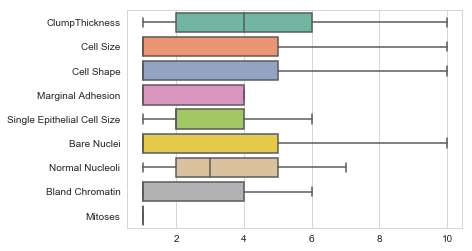

In [130]:
sns.boxplot(data=df_cancer1, orient='h',palette="Set2")

In [ ]:
# As Seen there are no outliers present

#### Standardization of the attributes

In [153]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X_cancer=scaler.fit_transform(df_cancer1)

In [154]:
X_cancer

array([[ 0.20282286, -0.70169775, -0.74503981, ..., -0.13140052,
        -0.67379358,  0.        ],
       [ 0.20282286,  0.28506471,  0.26891969, ..., -0.13140052,
        -0.18181732,  0.        ],
       [-0.50757194, -0.70169775, -0.74503981, ..., -0.13140052,
        -0.67379358,  0.        ],
       ...,
       [ 0.20282286,  2.25858965,  2.2968387 , ...,  1.76737138,
         1.78608774,  0.        ],
       [-0.15237454,  1.600748  ,  0.9448927 , ...,  1.76737138,
         1.78608774,  0.        ],
       [-0.15237454,  1.600748  ,  1.6208657 , ...,  1.76737138,
         0.80213521,  0.        ]])

# Q6 Create a covariance matrix for identifying Principal components

In [155]:
# PCA
# Step 1 - Create covariance matrix
cov_matrix=np.cov(X_cancer.T)

In [142]:
cov_matrix

array([[1.00145138, 0.64410677, 0.65453792, 0.55329897, 0.56014292,
        0.59150555, 0.57632311, 0.5573719 , 0.        ],
       [0.64410677, 1.00145138, 0.9066632 , 0.72204998, 0.78736392,
        0.68556472, 0.74749076, 0.73254055, 0.        ],
       [0.65453792, 0.9066632 , 1.00145138, 0.7042574 , 0.75864187,
        0.70518656, 0.73047144, 0.72736411, 0.        ],
       [0.55329897, 0.72204998, 0.7042574 , 1.00145138, 0.6675427 ,
        0.69693138, 0.68237584, 0.64893231, 0.        ],
       [0.56014292, 0.78736392, 0.75864187, 0.6675427 , 1.00145138,
        0.64591131, 0.67167598, 0.70333283, 0.        ],
       [0.59150555, 0.68556472, 0.70518656, 0.69693138, 0.64591131,
        1.00145138, 0.69379705, 0.62721796, 0.        ],
       [0.57632311, 0.74749076, 0.73047144, 0.68237584, 0.67167598,
        0.69379705, 1.00145138, 0.68956763, 0.        ],
       [0.5573719 , 0.73254055, 0.72736411, 0.64893231, 0.70333283,
        0.62721796, 0.68956763, 1.00145138, 0.        ],


# Q7 Identify eigen values and eigen vector

In [0]:
# Step 2- Get eigen values and eigen vector

In [145]:
eigval,eigenvec=np.linalg.eig(cov_matrix)

In [147]:
print(eigenvec)

[[ 0.31096089  0.9093221   0.00980781  0.12232872 -0.16292133 -0.06577648
   0.16826314 -0.04683747  0.        ]
 [ 0.38262801 -0.07120494  0.7331411   0.27866918  0.29186297  0.25897475
  -0.23041508 -0.16742239  0.        ]
 [ 0.38013206 -0.01208693 -0.66672457  0.24937297  0.46108861  0.2409743
  -0.26416395 -0.09050459  0.        ]
 [ 0.34704508 -0.16510325 -0.04473167 -0.47116551 -0.03748247  0.32880628
   0.5633476  -0.44880257  0.        ]
 [ 0.35535826 -0.2491162  -0.08280846  0.32757039 -0.66591669  0.32591289
   0.04513738  0.38183818  0.        ]
 [ 0.34468907  0.06712516  0.07777587 -0.62841253  0.18885867 -0.00564383
  -0.18985325  0.63560094  0.        ]
 [ 0.35461251 -0.12362896 -0.05150993 -0.20638424 -0.37502706 -0.48971209
  -0.50594566 -0.42103906  0.        ]
 [ 0.34802067 -0.2425061   0.01804883  0.27999329  0.23346749 -0.64525527
   0.48722751  0.18192943  0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          1.  

In [146]:
print(eigval)

[5.78844913 0.50506129 0.09079782 0.43669851 0.25418408 0.33552526
 0.30816399 0.29273095 0.        ]


# Q8 Find variance and cumulative variance by each eigen vector

In [148]:
print(eigenvec.var())

0.10883807059507526


In [149]:
tot = sum(eigval)
var_exp = [( i /tot ) * 100 for i in sorted(eigval, reverse=True)]
cum_var_exp = np.cumsum(eigval)   # array of size =  as many PC dimensions
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [5.78844913 6.29351042 6.38430824 6.82100675 7.07519083 7.41071609
 7.71888008 8.01161103 8.01161103]


# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [156]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(X_cancer)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [158]:
pca.components_

array([[ 0.31096089,  0.38262801,  0.38013206,  0.34704508,  0.35535826,
         0.34468907,  0.35461251,  0.34802067, -0.        ],
       [ 0.9093221 , -0.07120494, -0.01208693, -0.16510325, -0.2491162 ,
         0.06712516, -0.12362896, -0.2425061 , -0.        ],
       [ 0.12232872,  0.27866918,  0.24937297, -0.47116551,  0.32757039,
        -0.62841253, -0.20638424,  0.27999329,  0.        ],
       [ 0.06577648, -0.25897475, -0.2409743 , -0.32880628, -0.32591289,
         0.00564383,  0.48971209,  0.64525527, -0.        ],
       [-0.16826314,  0.23041508,  0.26416395, -0.5633476 , -0.04513738,
         0.18985325,  0.50594566, -0.48722751, -0.        ],
       [-0.04683747, -0.16742239, -0.09050459, -0.44880257,  0.38183818,
         0.63560094, -0.42103906,  0.18192943,  0.        ],
       [ 0.16292133, -0.29186297, -0.46108861,  0.03748247,  0.66591669,
        -0.18885867,  0.37502706, -0.23346749,  0.        ],
       [ 0.00980781,  0.7331411 , -0.66672457, -0.04473167, -0

In [290]:
#Since there are nine attributes therefore nine pca components could be generated each 
#having the some weight of all the attributes.
#columns names
columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9']

In [285]:
df_PCA = pd.DataFrame(pca.components_,columns=list(columns))

In [286]:
df_PCA.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,0.310961,0.382628,0.380132,0.347045,0.355358,0.344689,0.354613,0.348021,-0.0
1,0.909322,-0.071205,-0.012087,-0.165103,-0.249116,0.067125,-0.123629,-0.242506,-0.0
2,0.122329,0.278669,0.249373,-0.471166,0.327570,-0.628413,-0.206384,0.279993,0.0
3,0.065776,-0.258975,-0.240974,-0.328806,-0.325913,0.005644,0.489712,0.645255,-0.0
4,-0.168263,0.230415,0.264164,-0.563348,-0.045137,0.189853,0.505946,-0.487228,-0.0


# Q10 Find correlation between components and features

In [287]:
df_PCA.corr()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
PC1,1.000000,-0.148280,0.100365,0.333145,-0.186485,-0.087056,-0.165320,-0.088236,-0.180819
PC2,-0.148280,1.000000,0.056897,0.188859,-0.105718,-0.049352,-0.093720,-0.050021,-0.102506
PC3,0.100365,0.056897,1.000000,-0.127832,0.071557,0.033404,0.063435,0.033857,0.069382
PC4,0.333145,0.188859,-0.127832,1.000000,0.237520,0.110880,0.210562,0.112383,0.230303
PC5,-0.186485,-0.105718,0.071557,0.237520,1.000000,-0.062068,-0.117867,-0.062909,-0.128917
PC6,-0.087056,-0.049352,0.033404,0.110880,-0.062068,1.000000,-0.055023,-0.029367,-0.060182
PC7,-0.165320,-0.093720,0.063435,0.210562,-0.117867,-0.055023,1.000000,-0.055769,-0.114286
PC8,-0.088236,-0.050021,0.033857,0.112383,-0.062909,-0.029367,-0.055769,1.000000,-0.060998
PC9,-0.180819,-0.102506,0.069382,0.230303,-0.128917,-0.060182,-0.114286,-0.060998,1.000000


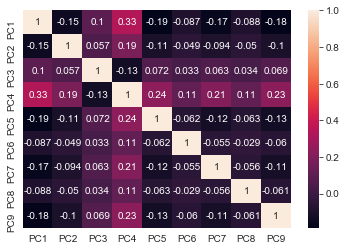

In [288]:
sns.heatmap(df_PCA.corr(),annot=True)

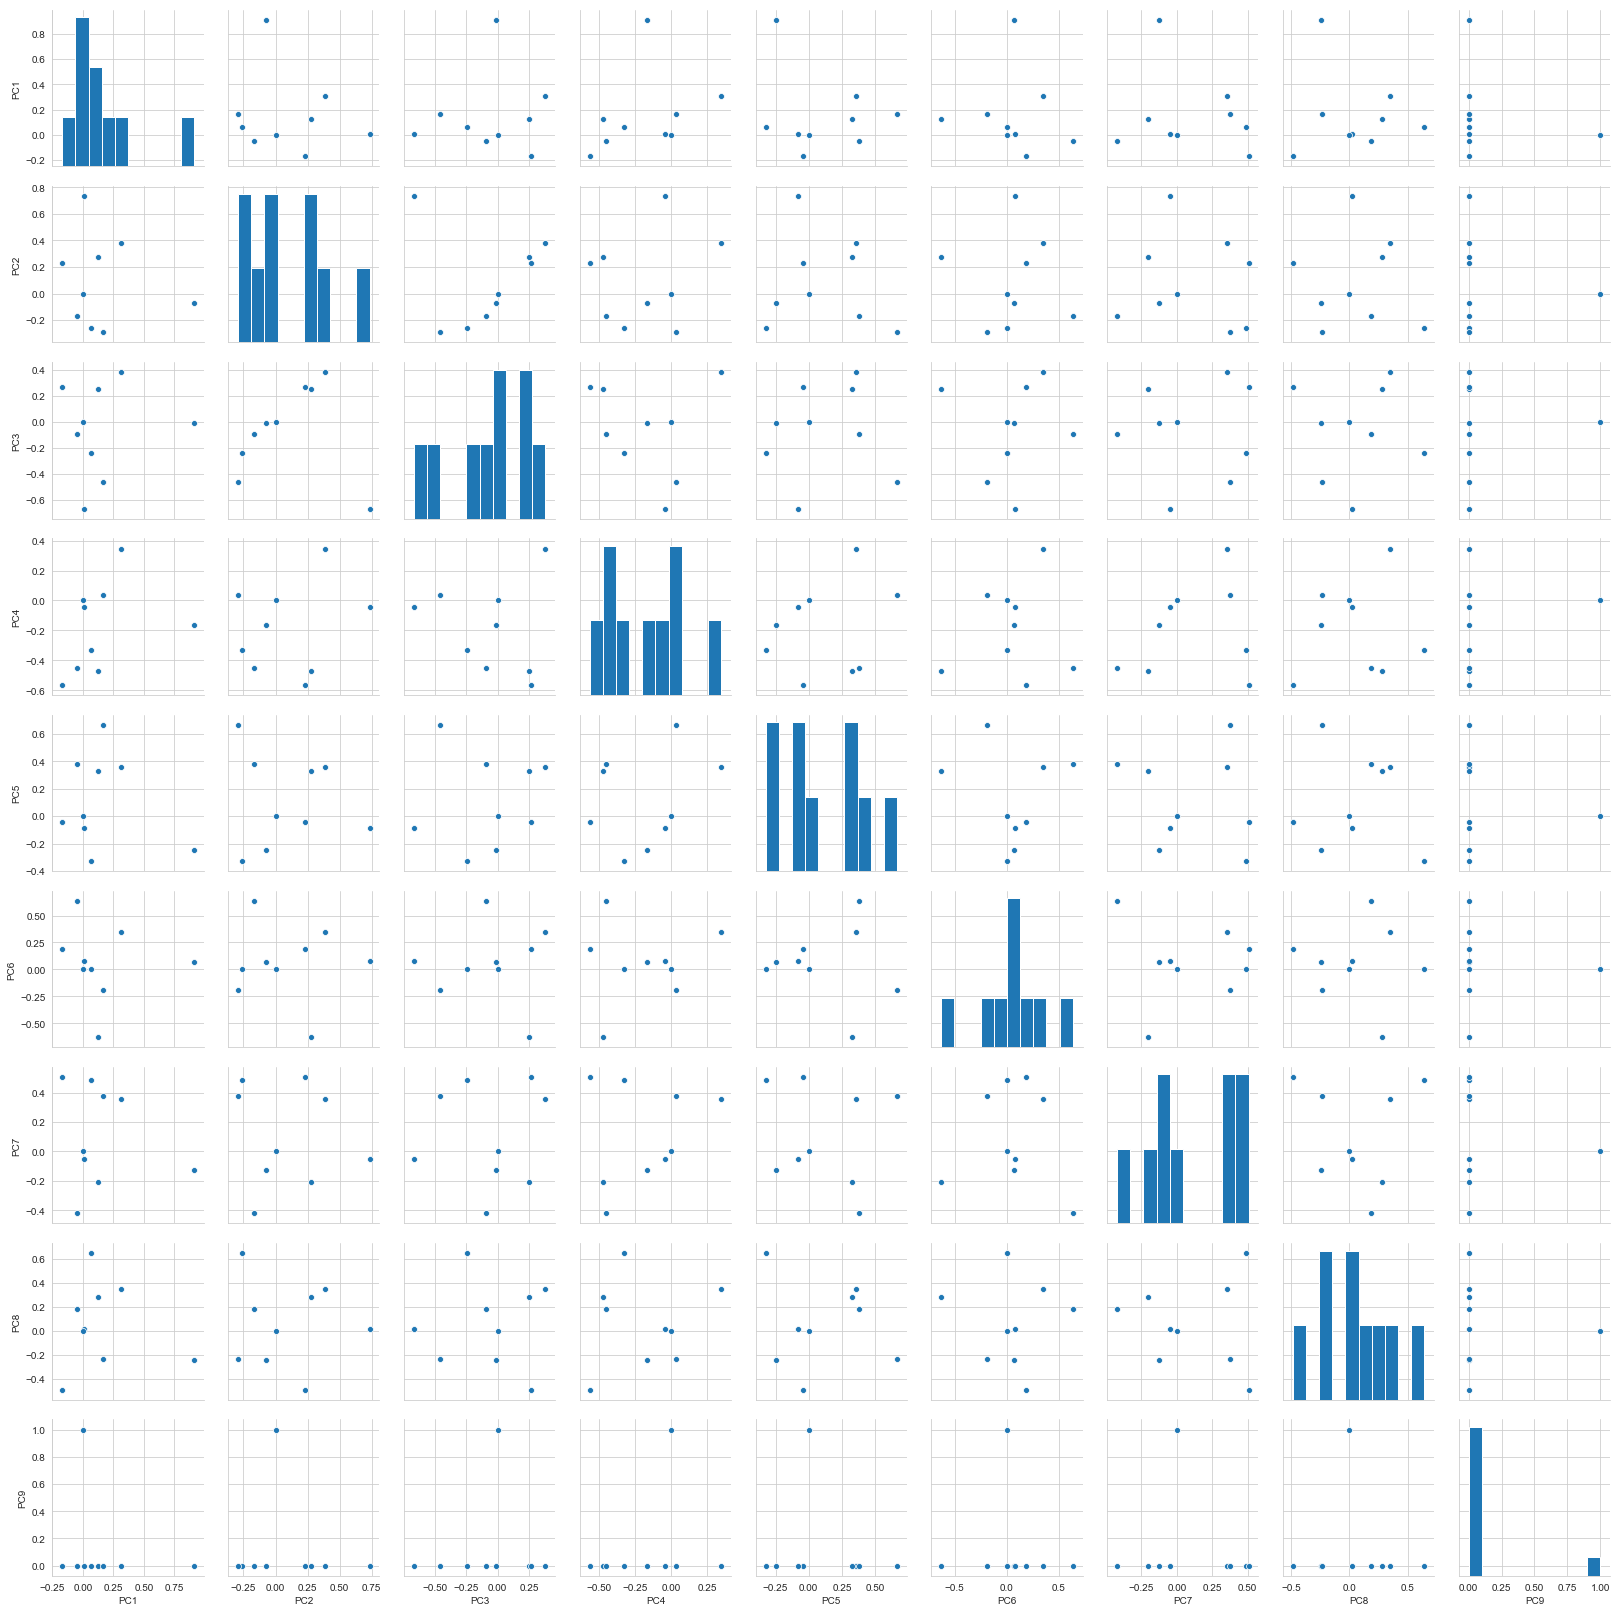

In [289]:
sns.pairplot(df_PCA)

As Seen after PCA there is very low correlation between the PCA components

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)


In [291]:
df_jokes=pd.read_csv('jokes.csv')

In [237]:
df_jokes.head(2)

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07


In [292]:
df_jokes.shape

(24983, 101)

# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [239]:
ratings=df_jokes.iloc[:200,1:]

In [240]:
ratings.shape

(200, 100)

In [241]:
ratings.head()

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q13 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [247]:
ratings.replace(99.00,0,inplace=True)

In [249]:
ratings.head()

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


### Popularity based recommendation system

# Q14  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [264]:
#The mean can be retrived from describe mention 
ratings.describe()

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.530050,0.593900,0.237650,-0.701000,-0.037900,1.320050,0.171500,-0.085300,0.016700,0.894700,...,0.56260,0.175100,1.155850,0.637900,0.581650,0.417550,0.755000,0.093700,0.135000,0.524400
std,4.507771,4.915306,4.471239,3.863859,5.433866,4.393323,5.627576,4.861652,4.037797,5.006043,...,2.93055,3.172647,3.199264,3.474739,3.314584,2.981439,3.243612,3.497441,3.265586,3.266252
min,-9.710000,-9.950000,-9.710000,-9.760000,-9.810000,-9.850000,-9.950000,-9.850000,-9.850000,-9.760000,...,-9.13000,-9.610000,-9.710000,-9.560000,-9.760000,-9.510000,-9.130000,-9.660000,-9.760000,-9.560000
25%,-0.852500,-2.595000,-0.727500,-1.685000,-4.220000,0.000000,-4.480000,-4.270000,-0.452500,-1.750000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.340000,0.000000,0.850000,0.680000,0.000000,0.680000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.412500,4.535000,2.330000,0.000000,4.232500,4.937500,4.685000,3.425000,1.335000,4.320000,...,0.00000,0.000000,1.612500,0.190000,0.000000,0.000000,0.110000,0.000000,0.000000,0.000000
max,9.270000,9.270000,9.270000,8.830000,9.220000,9.270000,9.270000,9.270000,9.030000,9.320000,...,9.08000,9.080000,9.170000,9.080000,9.130000,9.220000,9.170000,9.220000,8.980000,8.980000


In [256]:
#Fetching the mean rating for all the jokes in the data frame
ratings_diff=ratings.describe().iloc[1,:]

In [257]:
ratings_diff.head(5)

Joke1    0.53005
Joke2    0.59390
Joke3    0.23765
Joke4   -0.70100
Joke5   -0.03790
Name: mean, dtype: float64

In [259]:
#fetching the first top 10 ratings
ratings_diff.sort_values(ascending=False).head(10)

Joke50    4.05540
Joke36    3.61150
Joke53    3.57150
Joke35    3.22315
Joke29    3.18995
Joke27    3.05240
Joke62    2.86185
Joke49    2.85000
Joke32    2.77955
Joke31    2.65710
Name: mean, dtype: float64